In [115]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [116]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

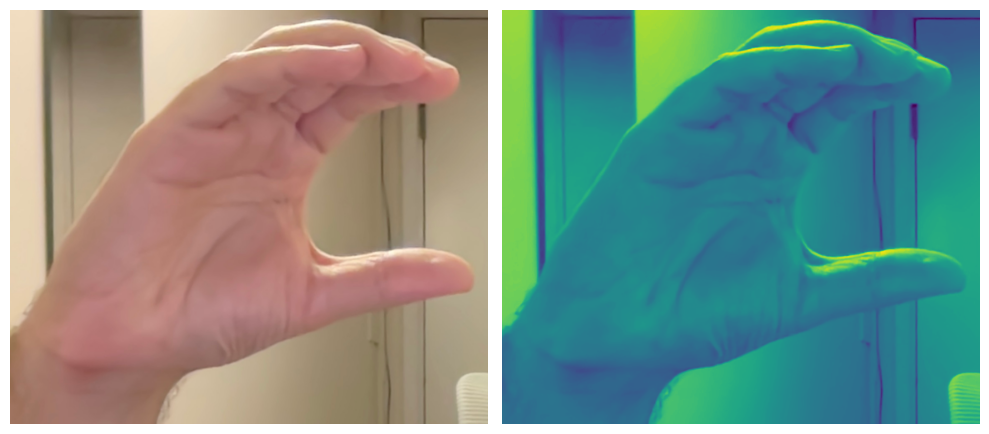

In [117]:
from copy import deepcopy

img_2 = cv.imread("img_2.png")
img = deepcopy(img_2)
gray = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

show_img_compar(img_2, gray)

In [118]:
from sklearn.cluster import KMeans

In [119]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

C:\Users\filbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


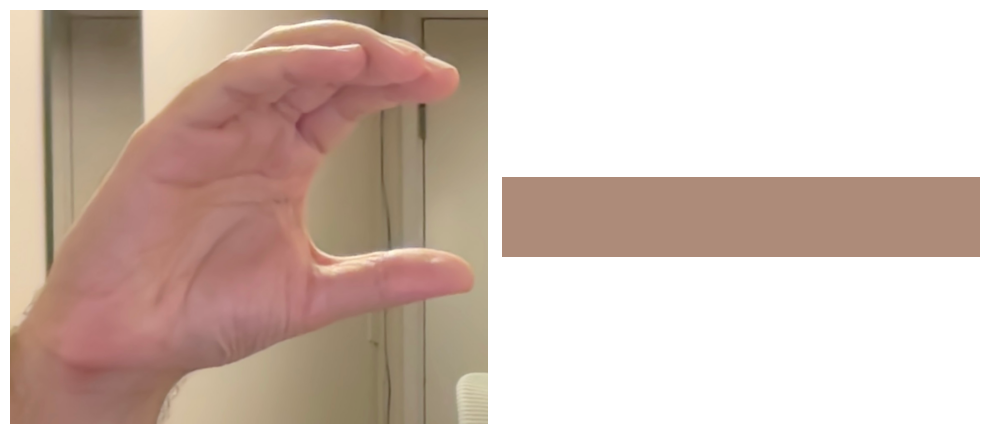

In [120]:
clt_1 = KMeans(n_clusters=1)
clt_1.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_1))

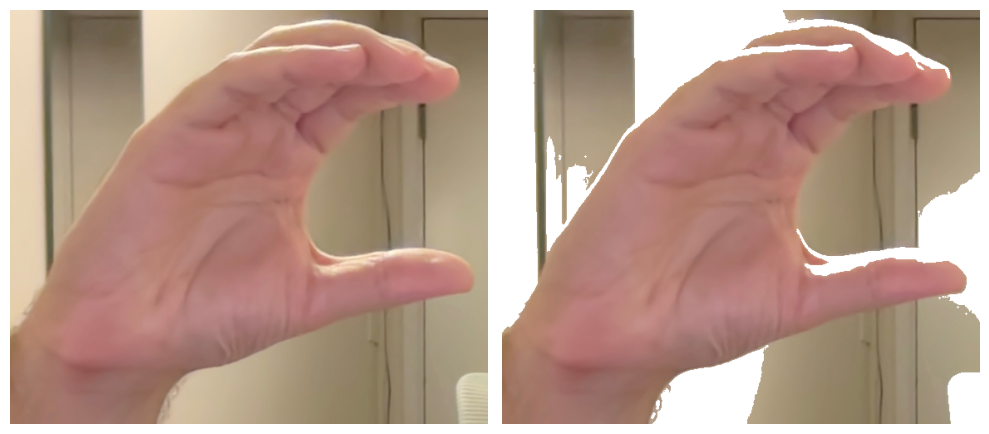

In [121]:
img_copy = deepcopy(img_2)
most_common_color = clt_1.cluster_centers_[0]

# apply otsu thresholding
gray = cv.cvtColor(img_copy, cv.COLOR_RGB2GRAY)
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# find contours
contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv.contourArea(cnt)
    if area < 1000:
        cv.drawContours(thresh, [cnt], -1, 0, -1)

# remove contours
img_copy[thresh == 0] = [255, 255, 255]
show_img_compar(img_2, img_copy)


[  4  86 170]


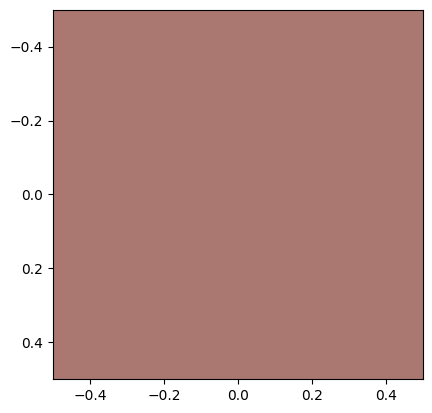

In [122]:
import numpy

# take center pixel
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)[img.shape[0]//2, img.shape[1]//2]

# show the color blob
color = numpy.uint8([[hsv]])
color = cv.cvtColor(color, cv.COLOR_HSV2RGB)
plt.imshow(color)
print(hsv)

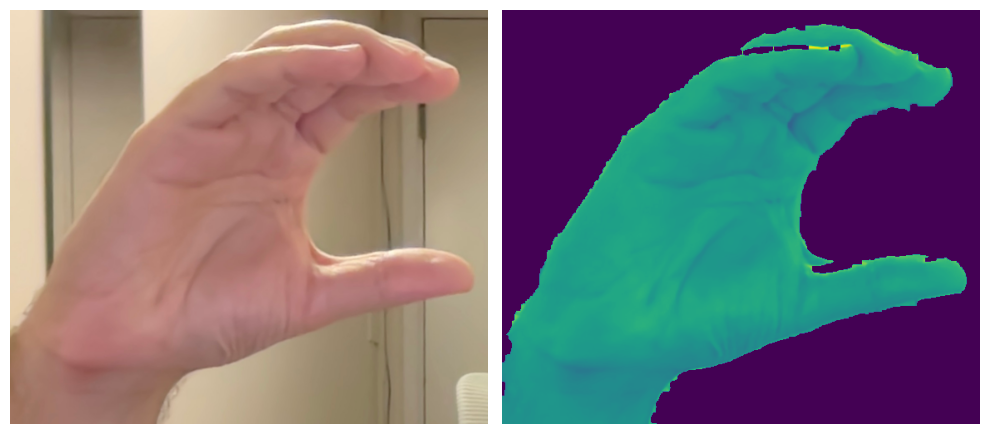

In [127]:
lower_bound = numpy.array([hsv[0] - 10, hsv[1] - 25, hsv[2] - 50])
upper_bound = numpy.array([hsv[0] + 10, hsv[1] + 25, hsv[2] + 50])

mask = cv.inRange(cv.cvtColor(img, cv.COLOR_BGR2HSV), lower_bound, upper_bound)

contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
mask = numpy.zeros_like(mask)

# fill largest contour with white
cv.drawContours(mask, [max(contours, key=cv.contourArea)], -1, 255, -1)
kernel = numpy.ones((5,5), numpy.uint8)
mask = cv.dilate(mask, kernel, iterations=1)
mask = cv.erode(mask, kernel, iterations=1)

result = cv.bitwise_and(img, img, mask=mask)
# convert to grayscale
result = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
show_img_compar(img_2, result)
